# Iris Dataset Prediction

## Data Loading
a) install libraries b)data loading c)data Clarification

In [1]:
# install Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load data

data = pd.read_csv(r"F:\Kaggle\Iris_prediction\Iris.csv")
print("Shape of the dataset --->",data.shape)

Shape of the dataset ---> (150, 6)


In [4]:
# data Clarification
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
# data lookup
data.head(4)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa


## Data Summary

In [11]:
data.describe(include='all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


## Explotory Data Analysis (EDA)

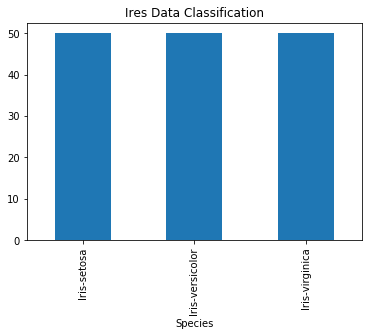

In [14]:
tar_group = data.groupby("Species")['Species'].count()
tar_group.plot(kind="bar",title ="Ires Data Classification")

In [18]:
tar_gro = data.groupby("Species").median()
tar_gro

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,25.5,5.0,3.4,1.50,0.2
Iris-versicolor,75.5,5.9,2.8,4.35,1.3
Iris-virginica,125.5,6.5,3.0,5.55,2.0


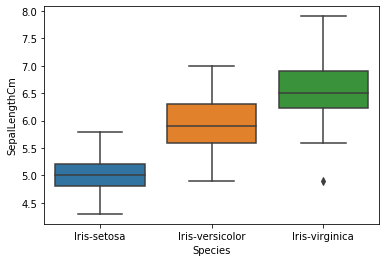

In [17]:
sns.boxplot(x="Species",y="SepalLengthCm",data=data)

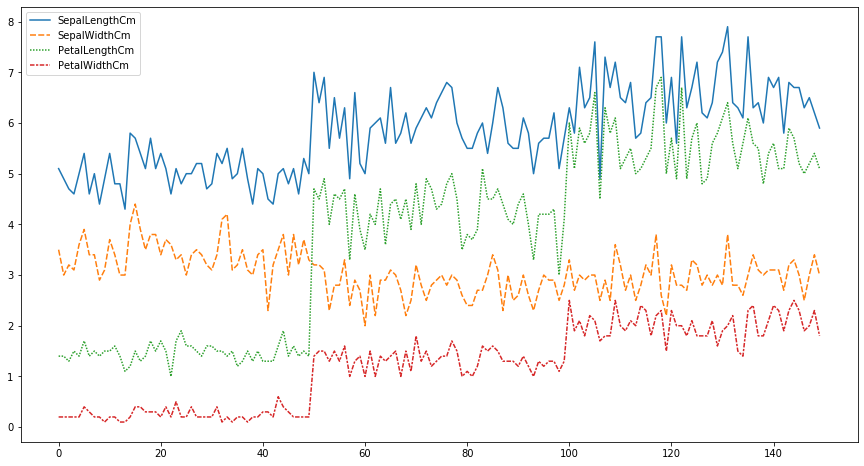

In [34]:
fig = plt.gcf()

# Changing Seaborn Plot size
fig.set_size_inches(15, 8)

data_line = data[['SepalLengthCm','SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].copy()
line = sns.lineplot(data = data_line,size=(19,5))


[Text(0, 0.5, 'Petal Length in Cm'), Text(0.5, 0, 'Spedal Length in Cm')]

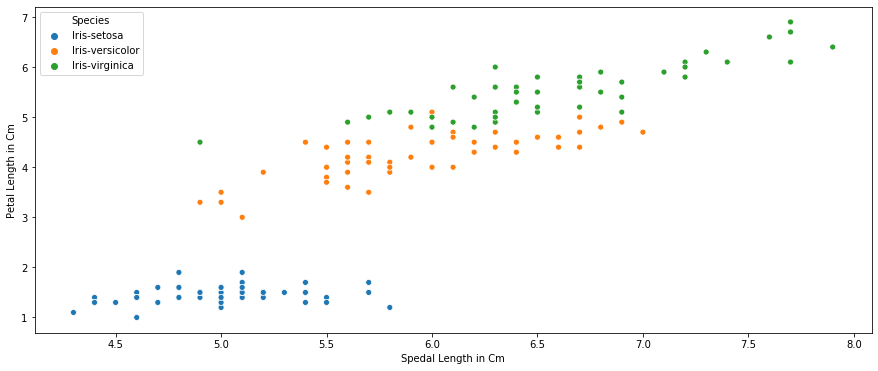

In [38]:
fig = plt.gcf()

# Changing Seaborn Plot size
fig.set_size_inches(15, 6)

scat = sns.scatterplot(x='SepalLengthCm', 
                y='PetalLengthCm',hue = "Species" ,
                data= data,
                )
scat.set(xlabel='Spedal Length in Cm', ylabel='Petal Length in Cm')

# Corrilation Between the Variable

In [42]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
data['Species']= data['Species'].replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],[0,1,2])

In [50]:
data.corr()['Species']


Id               0.942830
SepalLengthCm    0.782561
SepalWidthCm    -0.419446
PetalLengthCm    0.949043
PetalWidthCm     0.956464
Species          1.000000
Name: Species, dtype: float64

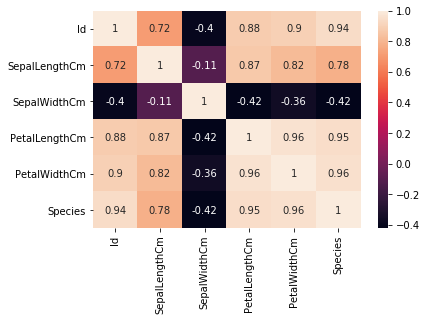

In [53]:
sns.heatmap(data.corr(),annot=True)

# Missing Values Impuation

In [55]:
# There is no null values in any column
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

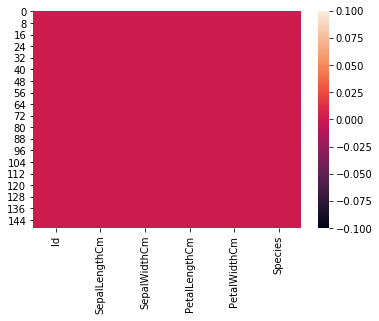

In [56]:
sns.heatmap(data.isnull())

# Feature Engineering

In [63]:
# Calculate the patel area and sepiral area 
data['petal_area'] = data['PetalLengthCm'] * data['PetalWidthCm']
data['sepal_area'] = data['SepalLengthCm'] * data['SepalWidthCm']
data['full'] = data['petal_area'] + data['sepal_area']
data.head(4)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,petal_area,sepal_area,full
0,1,5.1,3.5,1.4,0.2,0,0.28,17.85,18.13
1,2,4.9,3.0,1.4,0.2,0,0.28,14.70,14.98
2,3,4.7,3.2,1.3,0.2,0,0.26,15.04,15.30
3,4,4.6,3.1,1.5,0.2,0,0.30,14.26,14.56


In [64]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species', 'petal_area', 'sepal_area', 'full'],
      dtype='object')

# Dealing with Catogarical values

In [65]:
#there is no catogarical data om the dataset|

In [66]:
data.corr()['Species']

Id               0.942830
SepalLengthCm    0.782561
SepalWidthCm    -0.419446
PetalLengthCm    0.949043
PetalWidthCm     0.956464
Species          1.000000
petal_area       0.950142
sepal_area       0.301045
full             0.791500
Name: Species, dtype: float64

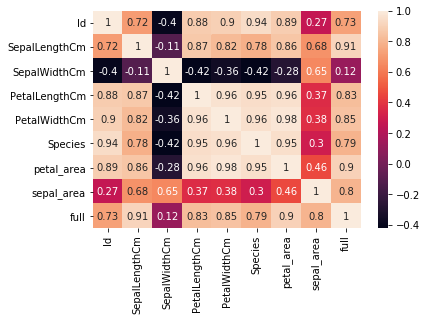

In [67]:
sns.heatmap(data.corr(),annot=True)

# Data Modeling

### Data train and test split

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics

In [74]:
X = data.drop(['Species'] ,axis = 1)
y=data['Species'].copy()

In [76]:
X_train , X_test , y_train ,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

In [78]:
print("shape of the train dataset --->",X_train.shape)
print("shape of the train dataset --->",y_train.shape)
print("shape of the test dataset --->",X_test.shape)
print("shape of the test dataset --->",y_test.shape)


shape of the train dataset ---> (120, 8)
shape of the train dataset ---> (120,)
shape of the test dataset ---> (30, 8)
shape of the test dataset ---> (30,)


## Train the model

In [79]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [80]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


,73,18,118,78,76,31,64,141,68,82,...,29,127,26,128,131,145,108,143,45,30
Species,1.0,0.0,2.0,1.0,1.0,0.0,1.0,2.0,1.0,1.0,...,0.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0
Unnamed 0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
